In [80]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from enum import Enum
from google.colab import files

In [81]:
class Colors(Enum):
    blue = '#0A85FF'
    darkblue = '#00264D'
    green = '#99CC00'
    darkgreen = '#739900'

In [82]:
df = pd.read_csv("https://raw.githubusercontent.com/alex/nyt-2020-election-scraper/master/battleground-state-changes.csv")

#df.head(10)

In [83]:
# Restructure data frame for easier access to Biden and Trump votes

def get_candidate_votes(row):
    if row['leading_candidate_name'] == 'Biden':
        row['biden_votes'] = row['leading_candidate_votes']
        row['trump_votes'] = row['trailing_candidate_votes']
    elif row['leading_candidate_name'] == 'Trump':
        row['biden_votes'] = row['trailing_candidate_votes']
        row['trump_votes'] = row['leading_candidate_votes']
    return row

df = df.apply(get_candidate_votes, axis=1)

In [84]:
class LinearRegression():
  def fit(self, x ,y):
    # Define the Linear Regression here
    ones = np.ones((x.shape[0], 1))
    x = np.hstack((ones, x))
    w = np.linalg.inv(x.T @ x) @ x.T @ y
    self.w = w
  
  def predict(self, x):
    """ 
    Define the line here.
    Map x to it's y coordinates. The set {(x,y) | x from input, y from output} 
    should define your line.
    In this case x will be percentages reported like
    np.linspace(0.94, 1, 100).reshape([-1,1]) from 94% to 100%
    in Georgia
    """
    ones = np.ones((x.shape[0], 1))
    x = np.hstack((ones, x))
    return x @ self.w



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

[0.00808427 0.00908312 0.0091053  0.00916923 0.00940691 0.00996627
 0.01138505 0.01152192 0.01156595 0.01218855 0.0142313  0.01432719
 0.01432753 0.01444365 0.01458289 0.01602395 0.01607283 0.01613157
 0.01616073 0.01700945 0.01701039 0.01701047 0.01742744 0.01793103
 0.01799997 0.01800677 0.01803151 0.01807393 0.0184251  0.01862707
 0.01883432 0.01885532 0.02049122 0.0207709  0.02081357 0.0208202 ]
[0.00808427 0.00908312 0.0091053  0.00916923 0.00940691 0.00996627
 0.01138505 0.01152192 0.01156595 0.01218855 0.0142313  0.01432719
 0.01432753 0.01444365 0.01458289 0.01602395 0.01607283 0.01613157
 0.01616073 0.01700945 0.01701039 0.01701047 0.01742744 0.01793103
 0.01799997 0.01800677 0.01803151 0.01807393 0.0184251  0.01862707
 0.01883432 0.01885532 0.02049122 0.0207709  0.02081357 0.0208202 ]


Text(0.5, 0, "Trump's percentage lead")

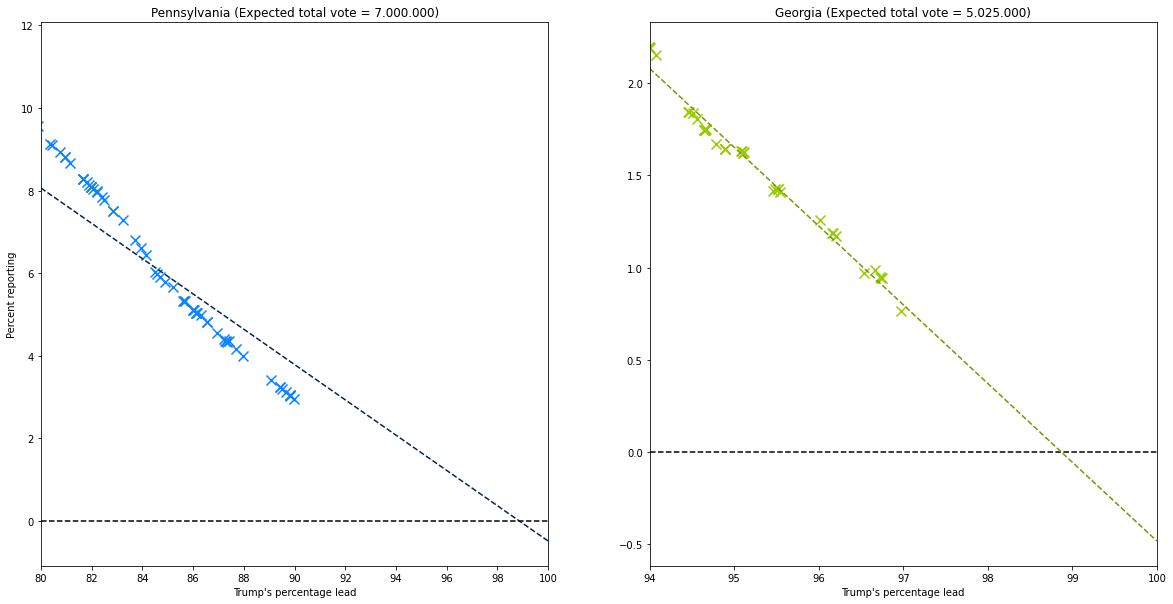

In [85]:
#Pennsylvania
df_py = df[df['state'] == 'Pennsylvania (EV: 20)']
df_py['percent_reporting'] = df_py['total_votes_count'] / int(7e+6)
df_py['trump_lead'] = (df_py['trump_votes'] - df_py['biden_votes']) / df_py['total_votes_count']
df_py = df_py.sort_values('percent_reporting', axis=0, ascending=False)

# Only view votes that were counted before 90% were reported
df_py = df_py[df_py['percent_reporting'] <= 0.9]

X = df_py['percent_reporting'].to_numpy().reshape([-1, 1])
y = df_py['trump_lead'].to_numpy()

model = LinearRegression()

# Fit x to y using Linear Regression
model.fit(X, y)

#Georgia
df_ga = df[df['state'] == 'Georgia (EV: 16)']
df_ga['percent_reporting'] = df_ga['total_votes_count'] / int(5.025e+6)
df_ga['trump_lead'] = (df_ga['trump_votes'] - df_ga['biden_votes']) / df_ga['total_votes_count']
df_ga = df_ga.sort_values('percent_reporting', axis=0, ascending=False)

# Only view votes that were counted before 97% were reported
df_ga = df_ga[df_ga['percent_reporting'] <= 0.97]

X = df_ga['percent_reporting'].to_numpy().reshape([-1, 1])
y = df_ga['trump_lead'].to_numpy()

# Fit x to y using Linear Regression
model.fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].scatter(df_py['percent_reporting'] * 100, df_py['trump_lead'] * 100, marker='x', s=100, color=Colors.blue.value)
x = np.linspace(0.8, 1, 100).reshape([-1,1])
y = model.predict(x)
ax[0].set_xlim([85, 100])
ax[0].set_xticks(range(80, 101, 2))
ax[0].plot(x * 100, y * 100, linestyle='--', color=Colors.darkblue.value)
ax[0].hlines(y=0, xmin=80, xmax=100, linestyle='--', color='black')
ax[0].set_title('Pennsylvania (Expected total vote = 7.000.000)')

ax[1].scatter(df_ga['percent_reporting'] * 100, df_ga['trump_lead'] * 100, marker='x', s=100, color=Colors.green.value)
x = np.linspace(0.94, 1, 100).reshape([-1,1])
y = model.predict(x)
ax[1].set_xlim([94, 100])
ax[1].set_xticks(range(94, 101, 1))
ax[1].plot(x * 100, y * 100, linestyle='--', color=Colors.darkgreen.value)
ax[1].hlines(y=0, xmin=94, xmax=100, linestyle='--', color='black')
ax[1].set_title('Georgia (Expected total vote = 5.025.000)')

ax[0].set_ylabel("Percent reporting")
ax[0].set_xlabel("Trump's percentage lead")
ax[1].set_xlabel("Trump's percentage lead")
# plt.savefig('trump_lead.svg', transparent=True)

At what percentage of reported votes will Biden lead over Trump?